<a href="https://colab.research.google.com/github/Faryal112/Faryal112/blob/main/FYP_model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_stream-oper.csv to data_stream-oper.csv


In [5]:
!pip install ppscore

In [7]:
!pip install pandas==1.5.3  # Choose a version within the required range

In [8]:
!pip install --upgrade ppscore

In [9]:
!python3 -m venv myenv
!source myenv/bin/activate
!pip install pandas ppscore  # Install packages within the environment

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [10]:
# Original Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
!pip install --upgrade ppscore # Upgrade ppscore first
import ppscore as pps # Import ppscore after potential upgrade
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

ContextualVersionConflict: (pandas 2.2.2 (/usr/local/lib/python3.10/dist-packages), Requirement.parse('pandas<2.0.0,>=1.0.0'), {'ppscore'})

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np

In [19]:
# Load the dataset
data = pd.read_csv('data_stream-oper.csv')

# Display basic info
print(data.info())
print(data.head())

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Drop or fill missing values as needed (example using forward fill)
data.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valid_time  23350 non-null  object 
 1   latitude    23350 non-null  float64
 2   longitude   23350 non-null  float64
 3   number      23350 non-null  int64  
 4   expver      23350 non-null  int64  
 5   u10         23350 non-null  float64
 6   v10         23350 non-null  float64
 7   sst         0 non-null      float64
 8   sp          23350 non-null  float64
 9   hcc         23350 non-null  float64
 10  lcc         23350 non-null  float64
 11  mcc         23350 non-null  float64
 12  tcc         23350 non-null  float64
 13  tciw        23350 non-null  float64
 14  tclw        23350 non-null  float64
 15  p90.162     23350 non-null  float64
 16  p88.162     23350 non-null  float64
 17  p89.162     23350 non-null  float64
 18  licd        23350 non-null  float64
 19  lmld        23350 non-nul

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('data_stream-oper.csv')

# Convert 'valid_time' to numeric representation
# Assuming 'valid_time' is a datetime column
data['valid_time'] = pd.to_datetime(data['valid_time'])  # Convert to datetime
data['valid_time'] = data['valid_time'].astype(np.int64) // 10**9 # Convert to Unix timestamp

# Initialize the scaler and apply to numeric features
scaler = MinMaxScaler()
numeric_features = data.select_dtypes(include=['number']).columns # Select only numeric columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Rest of your code...

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [21]:
# Initialize the scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare data for time series modeling (e.g., with 60 time steps)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

# Assume the last column is the target
X, y = create_sequences(data_scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [22]:
# Initialize the LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: nan - val_loss: nan
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: nan - val_loss: nan
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: nan - val_loss: nan
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: nan - val_loss: nan
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan - val_loss: nan
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: nan - val_loss: nan
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: nan - val_loss: nan
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: nan - val_loss: nan
Epoch 9/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: nan - val_loss: nan
Epoch 10/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan - val_loss: nan


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np


# ... (Your existing data loading, scaling, and sequence creation code) ...

# Initialize the LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Initialize the GRU model
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model with early stopping
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predictions
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

# ... (Rest of your code for inverse transformation and RMSE calculation) ...

Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: nan - val_loss: nan
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: nan - val_loss: nan
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: nan - val_loss: nan
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: nan - val_loss: nan
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: nan - val_loss: nan
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan - val_loss: nan
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: nan - val_loss: nan
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: nan - val_loss: nan
Epoch 9/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan - val_loss: nan
Epoch 10/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: nan - val_loss: nan
Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: nan - val_loss: nan
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: nan - val_loss: nan
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data_stream-oper.csv')

# Display column names and the first few rows to understand the data
print("Columns in the dataset:\n", data.columns)
print("\nFirst few rows:\n", data.head())


Columns in the dataset:
 Index(['valid_time', 'latitude', 'longitude', 'number', 'expver', 'u10', 'v10',
       'sst', 'sp', 'hcc', 'lcc', 'mcc', 'tcc', 'tciw', 'tclw', 'p90.162',
       'p88.162', 'p89.162', 'licd', 'lmld', 'ltlt', 'tsn', 'slt', 'vithe',
       'lai_hv'],
      dtype='object')

First few rows:
             valid_time  latitude  longitude  number  expver       u10  \
0  2020-05-01 00:00:00      36.0      70.83       0       1 -0.236581   
1  2020-05-01 00:00:00      36.0      71.08       0       1 -0.091348   
2  2020-05-01 00:00:00      36.0      71.33       0       1  0.447348   
3  2020-05-01 00:00:00      36.0      71.58       0       1  0.364432   
4  2020-05-01 00:00:00      36.0      71.83       0       1 -0.109628   

        v10  sst        sp       hcc  ...   p90.162   p88.162  p89.162  \
0  0.635636  NaN  61000.68  0.998981  ...  0.446365  0.000939  0.00145   
1  0.342240  NaN  59817.18  0.998553  ...  0.402031  0.000275  0.00145   
2 -0.264296  NaN  61669.1

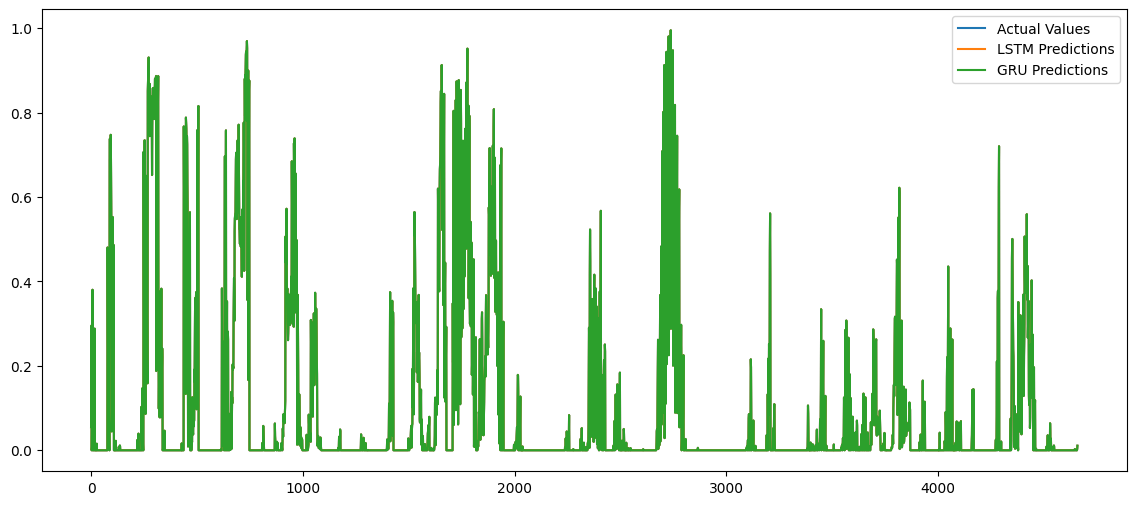

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing data loading, scaling, and sequence creation code) ...

# Assuming 'target_column_name' is the name of your target column
target_column_name = 'hcc'
# Replace with the actual column name

# Get the index of the target column for inverse scaling
target_column_index = data.columns.get_loc(target_column_name)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(data_scaled[len(data_scaled) - len(y_test):, :])[:, target_column_index]
y_pred_lstm_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_lstm.reshape(-1, 1)], axis=1))[:, target_column_index]
y_pred_gru_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_gru.reshape(-1, 1)], axis=1))[:, target_column_index]

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label="Actual Values")
plt.plot(y_pred_lstm_actual, label="LSTM Predictions")
plt.plot(y_pred_gru_actual, label="GRU Predictions")
plt.legend()
plt.show()

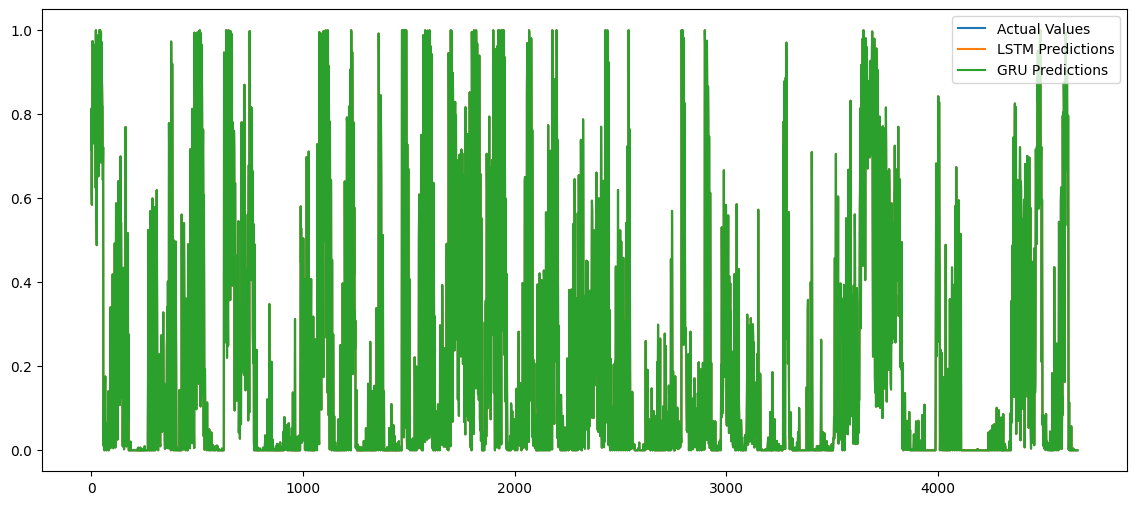

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing data loading, scaling, and sequence creation code) ...

# Assuming 'target_column_name' is the name of your target column
target_column_name = 'lcc'
# Replace with the actual column name

# Get the index of the target column for inverse scaling
target_column_index = data.columns.get_loc(target_column_name)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(data_scaled[len(data_scaled) - len(y_test):, :])[:, target_column_index]
y_pred_lstm_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_lstm.reshape(-1, 1)], axis=1))[:, target_column_index]
y_pred_gru_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_gru.reshape(-1, 1)], axis=1))[:, target_column_index]

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label="Actual Values")
plt.plot(y_pred_lstm_actual, label="LSTM Predictions")
plt.plot(y_pred_gru_actual, label="GRU Predictions")
plt.legend()
plt.show()

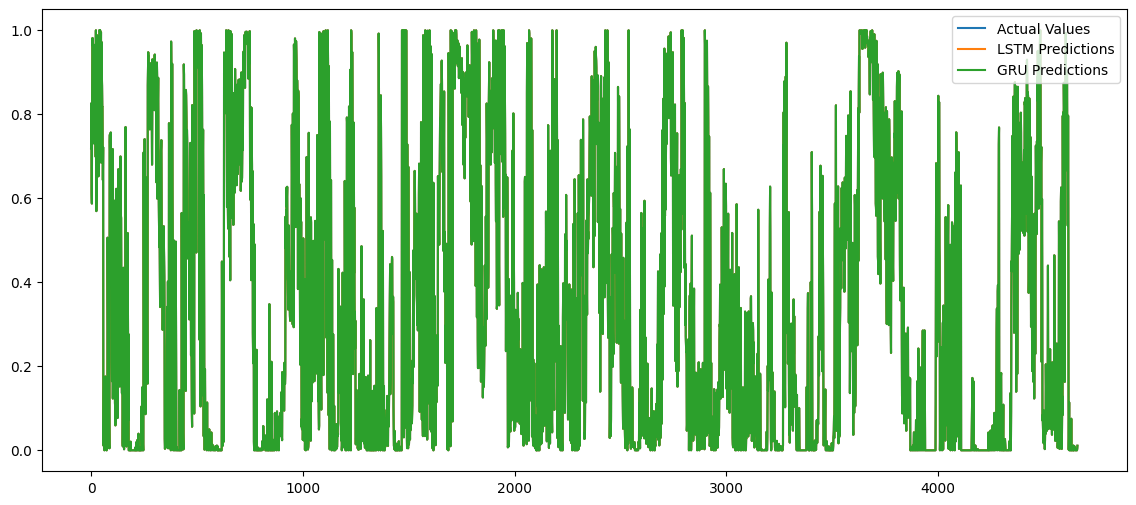

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing data loading, scaling, and sequence creation code) ...

# Assuming 'target_column_name' is the name of your target column
target_column_name = 'tcc'
# Replace with the actual column name

# Get the index of the target column for inverse scaling
target_column_index = data.columns.get_loc(target_column_name)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(data_scaled[len(data_scaled) - len(y_test):, :])[:, target_column_index]
y_pred_lstm_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_lstm.reshape(-1, 1)], axis=1))[:, target_column_index]
y_pred_gru_actual = scaler.inverse_transform(np.concatenate([data_scaled[len(data_scaled) - len(y_test):, :-1], y_pred_gru.reshape(-1, 1)], axis=1))[:, target_column_index]

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label="Actual Values")
plt.plot(y_pred_lstm_actual, label="LSTM Predictions")
plt.plot(y_pred_gru_actual, label="GRU Predictions")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics for LSTM
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm_actual)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_lstm_actual))
mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm_actual) / y_test_actual)) * 100

# Calculate evaluation metrics for GRU
mae_gru = mean_absolute_error(y_test_actual, y_pred_gru_actual)
rmse_gru = np.sqrt(mean_squared_error(y_test_actual, y_pred_gru_actual))
mape_gru = np.mean(np.abs((y_test_actual - y_pred_gru_actual) / y_test_actual)) * 100

# Display the evaluation metrics
print("LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%")

print("\nGRU Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_gru}")
print(f"Root Mean Squared Error (RMSE): {rmse_gru}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_gru:.2f}%")


LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): nan%

GRU Model Evaluation:
Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): nan%


<ipython-input-30-a683410608b5>:6: RuntimeWarning: invalid value encountered in divide
  mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm_actual) / y_test_actual)) * 100
<ipython-input-30-a683410608b5>:11: RuntimeWarning: invalid value encountered in divide
  mape_gru = np.mean(np.abs((y_test_actual - y_pred_gru_actual) / y_test_actual)) * 100


In [31]:
# Calculate Mean Absolute Percentage Error (MAPE) for LSTM
mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm_actual) / y_test_actual)) * 100
accuracy_lstm = 100 - mape_lstm

# Calculate Mean Absolute Percentage Error (MAPE) for GRU
mape_gru = np.mean(np.abs((y_test_actual - y_pred_gru_actual) / y_test_actual)) * 100
accuracy_gru = 100 - mape_gru

# Display the accuracy results
print("LSTM Model Accuracy:")
print(f"MAPE: {mape_lstm:.2f}%")
print(f"Accuracy Rate: {accuracy_lstm:.2f}%")

print("\nGRU Model Accuracy:")
print(f"MAPE: {mape_gru:.2f}%")
print(f"Accuracy Rate: {accuracy_gru:.2f}%")

# Display predictions and actual values in percentage form
print("\nSample Predictions (LSTM) vs Actual Values:")
for actual, pred in zip(y_test_actual[:10], y_pred_lstm_actual[:10]):  # Displaying first 10 predictions
    print(f"Actual: {actual:.2f}, LSTM Prediction: {pred:.2f}, Error: {abs(actual - pred) / actual * 100:.2f}%")

print("\nSample Predictions (GRU) vs Actual Values:")
for actual, pred in zip(y_test_actual[:10], y_pred_gru_actual[:10]):  # Displaying first 10 predictions
    print(f"Actual: {actual:.2f}, GRU Prediction: {pred:.2f}, Error: {abs(actual - pred) / actual * 100:.2f}%")


LSTM Model Accuracy:
MAPE: nan%
Accuracy Rate: nan%

GRU Model Accuracy:
MAPE: nan%
Accuracy Rate: nan%

Sample Predictions (LSTM) vs Actual Values:
Actual: 0.72, LSTM Prediction: 0.72, Error: 0.00%
Actual: 0.77, LSTM Prediction: 0.77, Error: 0.00%
Actual: 0.83, LSTM Prediction: 0.83, Error: 0.00%
Actual: 0.61, LSTM Prediction: 0.61, Error: 0.00%
Actual: 0.59, LSTM Prediction: 0.59, Error: 0.00%
Actual: 0.84, LSTM Prediction: 0.84, Error: 0.00%
Actual: 0.96, LSTM Prediction: 0.96, Error: 0.00%
Actual: 0.98, LSTM Prediction: 0.98, Error: 0.00%
Actual: 0.96, LSTM Prediction: 0.96, Error: 0.00%
Actual: 0.97, LSTM Prediction: 0.97, Error: 0.00%

Sample Predictions (GRU) vs Actual Values:
Actual: 0.72, GRU Prediction: 0.72, Error: 0.00%
Actual: 0.77, GRU Prediction: 0.77, Error: 0.00%
Actual: 0.83, GRU Prediction: 0.83, Error: 0.00%
Actual: 0.61, GRU Prediction: 0.61, Error: 0.00%
Actual: 0.59, GRU Prediction: 0.59, Error: 0.00%
Actual: 0.84, GRU Prediction: 0.84, Error: 0.00%
Actual: 0.96,

<ipython-input-31-4f8ec4d63e90>:2: RuntimeWarning: invalid value encountered in divide
  mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm_actual) / y_test_actual)) * 100
<ipython-input-31-4f8ec4d63e90>:6: RuntimeWarning: invalid value encountered in divide
  mape_gru = np.mean(np.abs((y_test_actual - y_pred_gru_actual) / y_test_actual)) * 100


In [34]:
# Replace with the predictions from the model of your choice
# For example, if using LSTM:
y_pred = y_pred_lstm_actual
# or if using GRU:
# y_pred = y_pred_gru_actual

# Now, calculate MAPE
mape = np.mean(np.abs((y_test_actual - y_pred) / np.where(y_test_actual == 0, 1, y_test_actual))) * 100